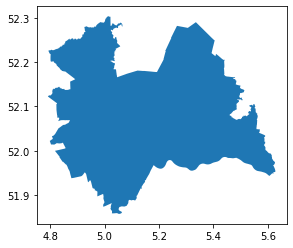

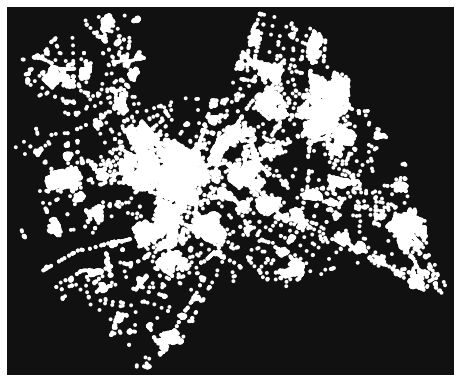

In [1]:

import osmnx as ox


import matplotlib.pyplot as plt

import networkx as nx

import pandas as pd

import numpy as np

import matplotlib.cm as cm

import csv


from shapely import geometry


query = {'state': 'Utrecht'}

# get the boundaries of the place
utrecht_boundary = ox.geocode_to_gdf(query)
utrecht_boundary.plot()

# or just get the street network within the place
G = ox.graph_from_place(query, network_type='drive')
fig, ax = ox.plot_graph(G, edge_linewidth=0)

In [2]:
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)


xmax = nodes.x.max()
xmin = nodes.x.min()
ymin = nodes.y.min()
ymax = nodes.y.max()

print(xmin, ymin, xmax, ymax)


4.7924835 51.8589517 5.6263757 52.2817361


## Lees data per plaats

In [3]:

postcodes = pd.read_excel('data/Consumenten_data/Postcodes Provincie Utrecht.xlsx') 
plaats = postcodes['Plaats'].unique()
plaats

array(['Abcoude', 'Nigtevecht', 'Baambrugge', 'de Hoef', 'Amstelhoek',
       'IJsselstein', 'Benschop', 'Lopik', 'Lopikerkapel', 'Jaarsveld',
       'Polsbroek', 'Montfoort', 'Oudewater', 'Snelrewaard', 'Nieuwegein',
       'Woerden', 'Vleuten', 'De Meern', 'Linschoten', 'Papekop',
       'Hekendorp', 'Kamerik', 'Zegveld', 'Harmelen', 'Utrecht',
       'Maarssen', 'Oud Zuilen', 'Tienhoven', 'Westbroek', 'Breukelen',
       'Nieuwer Ter Aa', 'Kockengen', 'Nieuwersluis',
       'Loenen aan de Vecht', 'Vreeland', 'Loenersloot', 'Mijdrecht',
       'Vinkeveen', 'Waverveen', 'Wilnis', 'Zeist', 'Austerlitz',
       'Huis ter Heide', 'Bilthoven', 'De Bilt', 'Den Dolder',
       'Bosch en Duin', 'Groenekan', 'Maartensdijk', 'Hollandsche Rading',
       'Baarn', 'Lage Vuursche', 'Bunschoten-Spakenburg', 'Eemdijk',
       'Eemnes', 'Soest', 'Soesterberg', 'Achterveld', 'Amersfoort',
       'Hoogland', 'Hooglanderveen', 'Leusden', 'Stoutenburg',
       'Stoutenburg Noord', 'Veenendaal', 'Rhenen'

In [4]:
area = utrecht_boundary.geometry.to_crs({'proj':'cea'}).area[0]/10**6
print('De provincie Utrecht beslaat {:.4f} km^2.'.format(area))

De provincie Utrecht beslaat 1560.3236 km^2.


Abcoude area: 22.74 square km
Nigtevecht area: 4.58 square km
Baambrugge area: 9.41 square km
de Hoef area: 5.68 square km
Amstelhoek area: 0.95 square km
IJsselstein area: 21.68 square km
Benschop area: 22.82 square km
Lopik area: 79.00 square km
Lopikerkapel area: 8.41 square km
Jaarsveld area: 0.35 square km
Polsbroek area: 11.71 square km
Montfoort area: 25.29 square km
Oudewater area: 19.96 square km
Snelrewaard area: 9.72 square km
Nieuwegein area: 25.65 square km
Woerden area: 24.49 square km
Vleuten area: 8.95 square km
De Meern area: 9.04 square km
Linschoten area: 12.92 square km
Papekop area: 5.08 square km
Hekendorp area: 5.34 square km
Kamerik area: 28.68 square km
Zegveld area: 16.01 square km
Harmelen area: 23.77 square km
Utrecht area: 75.03 square km
Maarssen area: 16.12 square km
Oud Zuilen area: 1.45 square km
Tienhoven area: 13.36 square km
Westbroek area: 12.38 square km
Breukelen area: 21.47 square km
Nieuwer Ter Aa area: 7.67 square km
Kockengen area: 19.48 squar

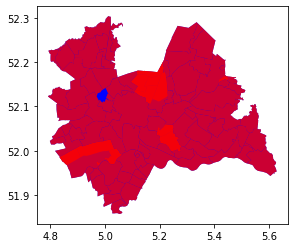

In [5]:
gemeente_boundaries = {}
fig,ax = plt.subplots()
utrecht_boundary.plot(ax=ax,color='b')
for gemeente in plaats:
    query= gemeente+",Utrecht, The Netherlands"
    gdf = ox.geocode_to_gdf( query)
    gdf.plot(ax=ax,color='r',alpha=0.8)
    gemeente_boundaries[gemeente] = gdf
    gdf = gdf['geometry'].to_crs({'proj':'cea'}) 
    print(gemeente+' area: {:.2f} square km'.format(gdf.area[0]/10**6))


plt.show()

In [6]:
import os
import time
import glob

cwd = os.getcwd()
caches = ['/data/cache/footprints_building/Utrecht_{}.pickle','/data/cache/footprints_landuse/Utrecht_{}.pickle','/data/cache/graph_raw/Utrecht.pickle']
# nx.write_gpickle(G,cwd+caches[2])
buildings = pd.DataFrame()
footpr = pd.DataFrame()
for gemeente in plaats:
    print(gemeente)
    pickleFilenamesList = glob.glob(cwd+caches[0].format(gemeente+'*'))
    st = time.time()
    for file in pickleFilenamesList:
        buildings=buildings.append(pd.read_pickle(file))
    print('for {} it took {:.2f} seconds to read buildings'.format(gemeente,time.time()-st))
    pickleFilenamesList = glob.glob(cwd+caches[1].format(gemeente+'*'))
    st = time.time()
    for file in pickleFilenamesList:
        footpr=footpr.append(pd.read_pickle(file))
    print('for {} it took {:.2f} seconds to read landuse'.format(gemeente,time.time()-st))
    
    

Abcoude
for Abcoude it took 0.03 seconds to read buildings
for Abcoude it took 0.01 seconds to read landuse
Nigtevecht
for Nigtevecht it took 0.02 seconds to read buildings
for Nigtevecht it took 0.01 seconds to read landuse
Baambrugge
for Baambrugge it took 0.02 seconds to read buildings
for Baambrugge it took 0.01 seconds to read landuse
de Hoef
for de Hoef it took 0.02 seconds to read buildings
for de Hoef it took 0.01 seconds to read landuse
Amstelhoek
for Amstelhoek it took 0.02 seconds to read buildings
for Amstelhoek it took 0.01 seconds to read landuse
IJsselstein
for IJsselstein it took 0.09 seconds to read buildings
for IJsselstein it took 0.03 seconds to read landuse
Benschop
for Benschop it took 0.04 seconds to read buildings
for Benschop it took 0.02 seconds to read landuse
Lopik
for Lopik it took 0.13 seconds to read buildings
for Lopik it took 0.05 seconds to read landuse
Lopikerkapel
for Lopikerkapel it took 0.05 seconds to read buildings
for Lopikerkapel it took 0.02 s

for Langbroek it took 1.60 seconds to read buildings
for Langbroek it took 0.04 seconds to read landuse
Maarn
for Maarn it took 1.81 seconds to read buildings
for Maarn it took 0.03 seconds to read landuse
Maarsbergen
for Maarsbergen it took 1.66 seconds to read buildings
for Maarsbergen it took 0.03 seconds to read landuse
Leersum
for Leersum it took 3.62 seconds to read buildings
for Leersum it took 0.08 seconds to read landuse
Amerongen
for Amerongen it took 1.77 seconds to read buildings
for Amerongen it took 0.03 seconds to read landuse
Overberg
for Overberg it took 1.61 seconds to read buildings
for Overberg it took 0.04 seconds to read landuse
Wijk bij Duurstede
for Wijk bij Duurstede it took 2.26 seconds to read buildings
for Wijk bij Duurstede it took 0.04 seconds to read landuse
Driebergen-Rijsenburg
for Driebergen-Rijsenburg it took 3.82 seconds to read buildings
for Driebergen-Rijsenburg it took 0.08 seconds to read landuse
Bunnik
for Bunnik it took 4.62 seconds to read bui

## Gevonden huishoudens in de provincie Utrecht

In [7]:
print('{} gebouwen gedownload in Utrecht'.format(len(buildings)))
print(buildings.building.value_counts())

print((578906 - 385941)/22177)

408146 gebouwen gedownload in Utrecht
house          385941
apartments      22177
residential        28
Name: building, dtype: int64
8.701131803219551


Er zijn in totaal 578.906 woningen in provincie Utrecht. Van de BAG data krijgen we 408.146 gebouwen, waarvan 22.177 apartementen. Als elk apartementen gebouw gemiddeld 8.7 woningen bevat, zouden deze cijfers ongeveer moeten kloppen. 

# Landbouw grondgebruik




In [15]:
footpr.landuse.value_counts()

meadow      12523
farmland     3523
orchard      2984
Name: landuse, dtype: int64

In [20]:
footpr.geometry_cea = footpr['geometry'].to_crs({'proj':'cea'}) 
footpr['area_km2'] = footpr.geometry_cea.area/10**6
print('Agricultural landuse: {:.2f} km^2'.format(footpr['area_km2'].sum()))

Agricultural landuse: 421.67 km^2


In [22]:


vcount = list(footpr.landuse.value_counts()[:25].index)
colors = {'village_green':'lightgreen','static_caravan':'yellow','water':'aqua',
            'road':'lightblue','mobile_home':'gray','building':'saddlebrown',
            'grass':'g','forest':'forestgreen','meadow':'lightgreen',
            'park':'palegreen','recreation_ground':'gold','commercial':'pink',
            'residential':'khaki','railway':'gray','retail':'fuchsia',
            'orchard':'darkgreen','allotments':'lightgray','industrial':'darkgray',
            'cemetery':'dimgray','farmland':'wheat','farmyard':'goldenrod',
            'paved':'rosybrown','construction':'indianred','reservoir':'lightblue',
            'depot':'gray','traffic_island':'brown','religious':'tan',
            'basin':'aqua','corral':'brown','greenhouse':'white','greenhouse_horticulture':'white'}

colormap = {}
for landuse in vcount:
    if landuse not in colors.keys():
        colormap[landuse] = 'indigo'
    else:
        colormap[landuse] = colors[landuse]
    

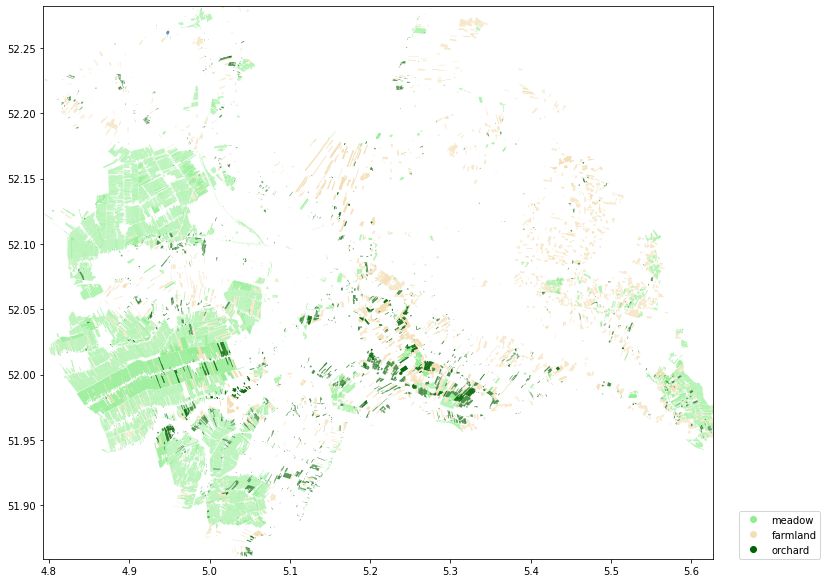

In [23]:
def plot_map(G,footpr,water,building,nodes,edges,vcount,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax):
    fig,ax=plt.subplots(figsize=(12,12))
    if len(footpr)>0:
        for i in range(0,len(vcount)):
            sub_footpr = footpr[footpr.landuse==vcount[i]]
            sub_footpr.plot(ax=ax,facecolor=colormap[vcount[i]], alpha=0.7,label=vcount[i])

#     edges.plot(ax=ax,alpha=0.5,edgecolor='royalblue')
     
    if len(water)>0:
        water[water.natural=='water'].plot(ax=ax,edgecolor='aqua',facecolor='aqua', alpha=0.5)
#     if len(building)>0:
#         building.plot(ax=ax,facecolor='saddlebrown',alpha=1)

    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colormap.values()]
    plt.legend(markers, colormap.keys(), loc=(1.04,0),numpoints=1)
    plt.savefig('landbouw_osm.png',dpi=300)
    

    
plot_map(G,footpr,[],buildings,nodes,edges,vcount)



In [192]:
import re
def clean_address(adres):
    straat_nummer = adres.split(',')[0]
    idx = straat_nummer.find('/')
    if idx > 0:
        straat_nummer = straat_nummer[:idx]

    sub_adres = re.findall(r"\b\d{1,7}[a-zA-Z]{1,2}\b", straat_nummer)

    if len(sub_adres) > 0:
        postcode_stad = adres.split(',')[1]
        adres = straat_nummer[:-1] + ', '+ postcode_stad
    else:
        if ',' in adres:
            postcode_stad = adres.split(',')[1]
            adres = straat_nummer + ', '+ postcode_stad
        else:
            print('pretty sure this is not an address')
    return adres

def drop_postcode(adres):
    if ',' in adres:
        straat_nummer = adres.split(',')[0]
        postcode_stad = adres.split(',')[1].strip()
        postcode = re.findall(r"\b\d{4}[\s?][a-zA-Z]{2}\b", postcode_stad)
        if len(postcode)==0:
            stad = postcode_stad.split(' ')[0]
        else:
            stad = postcode_stad.split(postcode[0])[1]
        return straat_nummer + ', ' + stad
    else:
        return adres
    
    
    
def geocode_adres(adres):
    try:
        huis = ox.geocoder.geocode(adres)
    except:
        adres = clean_address(adres)
        try:
            huis = ox.geocoder.geocode(adres)
        except:
            adres = drop_postcode(adres)
            try:
                huis = ox.geocoder.geocode(adres)
            except:
                print('unable to find '+adres)
                huis=(52.0,5.1)
    return huis
    
     

/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Moestuinen (uit de aangeleverde .xlsx)

## Buffers van 1 km (voornamelijk in Utrecht stad)

In [209]:
moestuinen = pd.read_excel('data/Producenten_data/Moestuinen_Utrecht.xlsx').dropna(how='all')
moestuinen.drop(moestuinen.tail(2).index,inplace=True)

moestuinen = moestuinen.dropna(axis=1,how='all')

       
    
    
moestuinen['locatie'] = ''
for index, row in moestuinen.iterrows():
    adres = row['Adres']
    locatie = geocode_adres(adres)
    moestuinen.loc[index]['locatie'] = locatie
    

/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


unable to find Plutodreef 9, 3561PX


In [210]:
moestuinen

/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Naam,Assortiment,Adres,Contact,Unnamed: 14,Unnamed: 16,Extra,locatie
0,Voedseltuin Overvecht,Seizoensgroenten,"Gangesdreef 7A, 3564SN Utrecht",info@voedseltuinovervecht.nl,tel:06-40815407,Mark Verhoef,Staan zeer open voor samenwerkingen in een duu...,"(52.1236697, 5.1041541)"
1,Kasteeltuin Nijevelt,Seizoensproducten,"Haarlerberg, 3453RM De Meern",ktnijevelt@gmail.com,tel:06-44455320,Jago van den Akker,NaN,"(52.0809091, 5.0181072)"
2,Spinozaplantsoen,Seizoensproducten,"Spinozaplantsoen, 3532SN Utrecht",info@spinozaplantsoen.nl,NaN,NaN,NaN,"(52.0950729, 5.0832713)"
3,Cremertuin,NaN,"Cremerstraat 248, 3532BJ Utrecht",https://www.cremertuin.nl/,tel:0624687808,Serge Calon,sergecalon@gmail.com,"(52.0960287, 5.0969611)"
4,Riddertuin,NaN,"Ridderlaan 5, 3523HP Utrecht",Riddertuin@gmail.com,NaN,NaN,NaN,"(52.0696826, 5.1274456)"
5,Tuinenpark De Driehoek,Groente/fruit/planten,"Winklerlaan 151, 3571KL Utrecht",natuurlijktuinieren@driehoektuin.nl,NaN,NaN,NaN,"(52.1108554, 5.1393356)"
7,Stadstuin Food for Good,Groente/fruit/planten,"Vreugdenhillaan 48, 3526ZA",foodforgood@utrechtnatuurlijk.nl,tel: 06 42 527 804,NaN,NaN,"(52.0684177, 5.1059325)"
8,Stadstuin Zuilen,groente/fruit/planten,"Daalseweg 150/150A, 3555SW Utrecht",stadstuinzuilen@utrechtnatuurlijk.nl,tel:030 753 38 30,NaN,NaN,"(52.1238561, 5.0693055)"
9,Stadstuin Plutodreef,groente/fruit/planten,"Plutodreef 9, 3561PX Utrecht",stadstuinplutodreef@utrechtnatuurlijk.nl,tel:030 753 38 00,NaN,NaN,"(52.0, 5.1)"
10,Stadstuin Klopvaart,groente/fruit/planten,"Vancouverdreef 70, 3564KX Utrecht",stadstuinklopvaart@utrechtnatuurlijk.nl,tel:030 753 38 30,NaN,NaN,"(52.1273269, 5.0993562)"


/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Moestuinen met buffers van 1km')

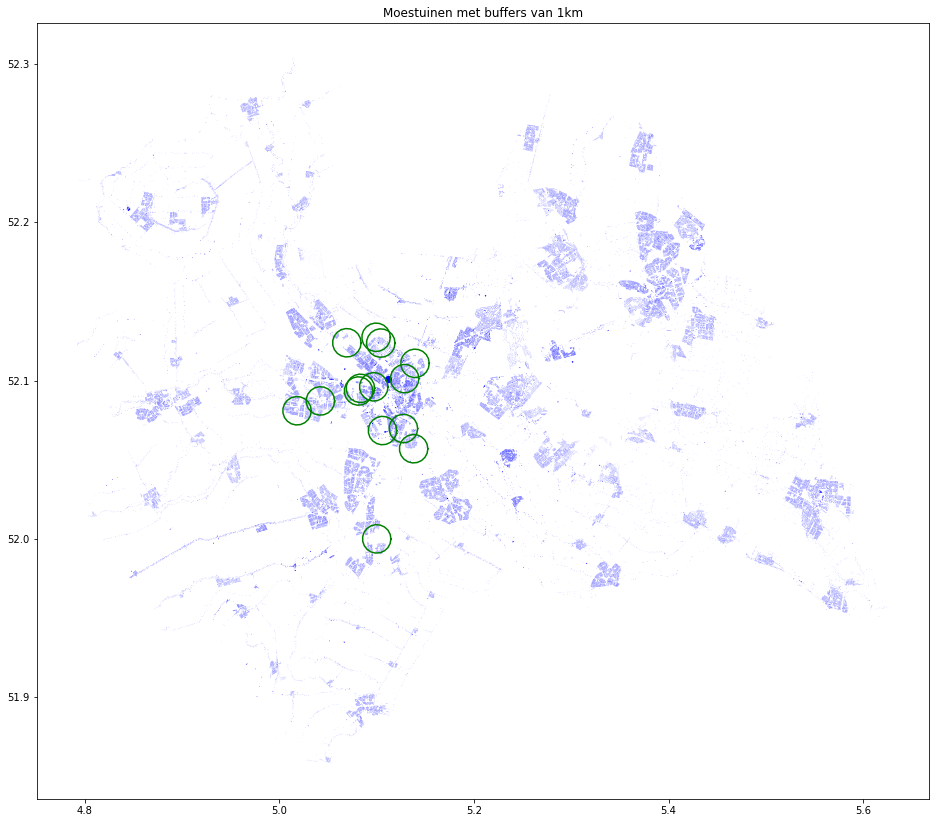

In [211]:
from shapely.geometry import Point, Polygon
import geog

fig,ax=plt.subplots(figsize=(16,16))
buildings.plot(ax=ax,color='b')
locatie_buffers_moestuinen = []

for i,row in moestuinen.locatie.items():
    centre = row[::-1]
    
    n_points = 20
    d = 1000  # meters
    angles = np.linspace(0, 360, n_points)
    polygon = geog.propagate(centre, angles, d)
    buffer_poly = Polygon(polygon)
    ax.plot(buffer_poly.exterior.coords.xy[0], buffer_poly.exterior.coords.xy[1],color='g')
    locatie_buffers_moestuinen.append(buffer_poly)
    
ax.set_title('Moestuinen met buffers van 1km')
    


In [212]:
intersected = pd.DataFrame(index=buildings.index)
for i,poly in enumerate(locatie_buffers_moestuinen):
    intersected['{}'.format(i)]=buildings['geometry'].apply(lambda geom: poly.intersects(geom))

print('{:.5f}% huishoudens covered by moestuinen buffers'.format(intersected.any(axis='columns').sum()/len(buildings)*100))
   

/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10.90321% huishoudens covered by moestuinen buffers


# Lokaalwijzer.nl (gescrapete data van de website)

## Landbouw winkels, voornamelijk in landelijke gebieden, gekozen voor een buffer van 2 km

In [213]:
winkels = pd.read_csv('data/producenten_scraped/lokaalwijzer_punt_nl_utrecht.csv',index_col=0).dropna(how='all')

       
    
    
winkels['locatie'] = ''
for index, row in winkels.iterrows():
    adres = row['address']
    locatie = geocode_adres(adres)
    winkels.loc[index]['locatie'] = locatie

/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


unable to find Groenekansweg  142, 3737AJ
unable to find Molenplein 1, 3984CZ


In [229]:
winkels

/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,products,address,description,locatie
384,De Moestuin,"Groenten, fruit, zuivel, eieren, brood, vlees,...","Laan van Maarschalkerweerd 2, 3585 LJ Utrecht",De Moestuin is een biologische tuinderij met z...,"(52.077966, 5.151729)"
390,Tuin Kansrijk,biologische groente en fruit,"Groenekansweg 142, 3737AJ Groenekan",Boodschappen doen in de buitenlucht! Tuin Kans...,"(52.0, 5.1)"
112,Landwinkel De Hooierij,"Vlees van eigen runderen, kip, varken, lam en ...","Universiteitsweg 1, 3732HX De Bilt",Landwinkel De Hooierij is onder meer gespecial...,"(52.1006222, 5.1851827)"
297,fruitbedrijf Westeneng,"Appels, peren, zomerfruit: aardbeien, kersen, ...","Tolakkerlaan 15 15, 3704JA zeist",NaN,"(52.085137, 5.1931078)"
34,Landwinkel de Groenekan,"Kippenvlees van eigen bedrijf, AGF, zuivel, bo...","Nieuwe Weteringseweg 139 139, 3737 MG Groenekan",Bij ons in de Landwinkel kunt u terecht voor a...,"(52.1411473, 5.1617731)"
...,...,...,...,...,...
88,Aerderoort boerenzuivel en boerderijwinkel,Streek producten,"Barneveldsestraat 37, 3927cb Renswoude","Aerderoort boerenzuivel, maakt kefir en Kefir ...","(52.0866119, 5.5397728)"
68,de Vosseburch,"Boerenkaas,","Langeraarseweg 160 160, 2461CN Langeraar",Van jong tot overjarig. Wij hebben alle smaken...,"(52.1918525, 4.7024558)"
227,Pompoenen van Verduijn,Pompoenen,"Priempad 12, 3896 LJ Zeewolde",Wij verkopen pompoenen bij ons aan de weg. We ...,"(52.3071102, 5.3716618)"
364,OostOogst,"seizoensgebonden, onbespoten groenten, lathyru...","Aalsmeerderweg 265, 1432 CN Aalsmeer",Wij telen onbespoten groenten gedurende ons se...,"(52.2798985, 4.7951384)"


/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Landwinkels met buffers van 2km')

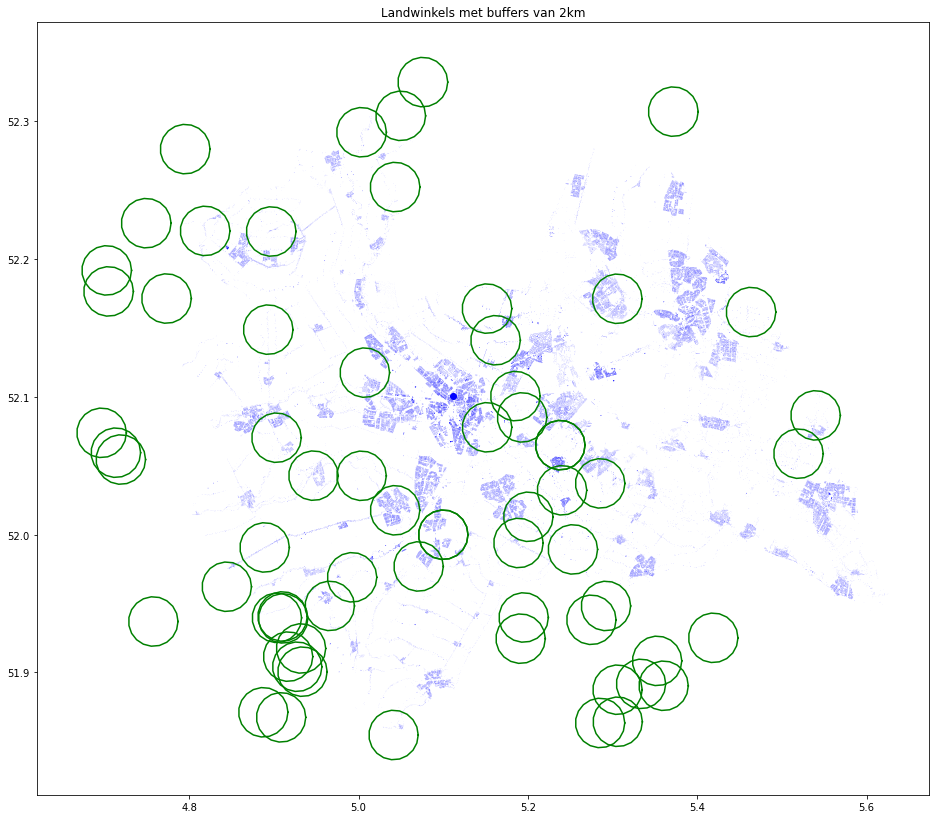

In [233]:
from shapely.geometry import Point, Polygon
import geog

fig,ax=plt.subplots(figsize=(16,16))
buildings.plot(ax=ax,color='b')
locatie_buffers_winkels = []

for i,row in winkels.locatie.items():
    centre = row[::-1]
    
    n_points = 20
    d = 2*1000  # meters
    angles = np.linspace(0, 360, n_points)
    polygon = geog.propagate(centre, angles, d)
    buffer_poly = Polygon(polygon)
    ax.plot(buffer_poly.exterior.coords.xy[0], buffer_poly.exterior.coords.xy[1],color='g')
    locatie_buffers_winkels.append(buffer_poly)
    
ax.set_title('Landwinkels met buffers van 2km')
    


In [234]:
intersected = pd.DataFrame(index=buildings.index)
for i,poly in enumerate(locatie_buffers_winkels):
    intersected['{}'.format(i)]=buildings['geometry'].apply(lambda geom: poly.intersects(geom))

print('{:.5f}% huishoudens covered by landwinkels buffers'.format(intersected.any(axis='columns').sum()/len(buildings)*100))
   

/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


21.19315% huishoudens covered by landwinkels buffers


# milieuwijzerutrecht.nl (gescrapete data van de website)
## Landbouwwinkels, voornamelijk in de omgeving van Utrecht stad, buffer van 1.5 km

In [235]:
winkels2 = pd.read_csv('data/producenten_scraped/milieuwijzerutrecht_punt_nl.csv',index_col=0).dropna(how='all')
winkels2=winkels2[winkels2.address != 'landelijk']
    
winkels2['locatie'] = ''
for index, row in winkels2.iterrows():
    adres = row['address']
    locatie = geocode_adres(adres)
    winkels2.loc[index]['locatie'] = locatie

unable to find Eikensteeg 13,  Maartensdijk
unable to find Het houden van bijen is gestart als hobby in het voorjaar van 1976 in Achtienhoven, voormalig
pretty sure this is not an address
unable to find Groene Ster Nederland wijst je de weg naar duurzame horeca
unable to find Eigen biologisch, biologische


/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [236]:
winkels2

/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,products,address,description,locatie
1,Boerderijwinkel Nieuw Rotsoord,"Eieren, fruit, noten, honing, kruiden.","Briljantlaan 101, 3523 CD Utrecht, Netherlands","Boerderijwinkel Nieuw Rotsoord\nEieren, fruit,...","(52.0744525, 5.1220248)"
2,Wildernis vlees,"Als u van lekker vlees houdt, natuur een warm ...","Bunnikseweg 39, 3732 HV De Bilt, Nederland","Wildernis vlees\nAls u van lekker vlees houdt,...","(52.0904948, 5.19178)"
6,Boerderijwinkel Zorgboerderij Nieuw Toutenburg,"Eigen groenten en fruit (duurzaam), regioprodu...","Dorpsweg 85, 3738 CB Maartensdijk, Netherlands",Boerderijwinkel Zorgboerderij Nieuw Toutenburg...,"(52.1586503, 5.1793391)"
7,Bloemisterij Bloemkracht8,Biologische bloemen uit volle grond.,"Koningslaan 5b, 3981 HD Bunnik, Netherlands",Bloemisterij Bloemkracht8\nBiologische bloemen...,"(52.0643491, 5.1638173)"
10,Familie Buijs,"Eigen asperges (ook boter, eieren, ham, etc.)","Soestdijkseweg Zuid 152, 3721 AH Bilthoven, Ne...","Familie Buijs\nEigen asperges (ook boter, eier...","(52.1174592, 5.2014751)"
13,De Wit Boerenkaas,Eigen boerenkaas,"Breudijk 45b, 3481 LN Harmelen, Netherlands",De Wit Boerenkaas\nEigen boerenkaas\nwww.dewit...,"(52.1073897, 4.9726144)"
14,Landwinkel Nieuw Slagmaat,"Eigen groenten/fruit (appels met Milieukeur), ...","Marsdijk 5, 3981 HE Bunnik, Netherlands",Landwinkel Nieuw Slagmaat\nEigen groenten/frui...,"(52.0546466, 5.156782973485438)"
16,De Veldkeuken,De Veldkeuken in Amelisweerd gebruikt de krach...,"Koningslaan 11, 3981 HD Bunnik, Nederland",De Veldkeuken\nDe Veldkeuken in Amelisweerd ge...,"(52.0674533, 5.1702164)"
20,Tuinderij de Volle Grond,Pergola bio-groenteabonnement Tuinderij De Vol...,"Koningslaan 5a, 3981 HD Bunnik, Netherlands",Tuinderij de Volle Grond\nPergola bio-groentea...,"(52.0643491, 5.1638173)"
22,Boerderij Eyckenstein,Landgoedwinkel met lokaal Jersey rundvlees. Oo...,"Eikensteeg 13, 3738 LD Maartensdijk, Nederland",Boerderij Eyckenstein\nLandgoedwinkel met loka...,"(52.0, 5.1)"


/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Landwinkels met buffers van 1.5km')

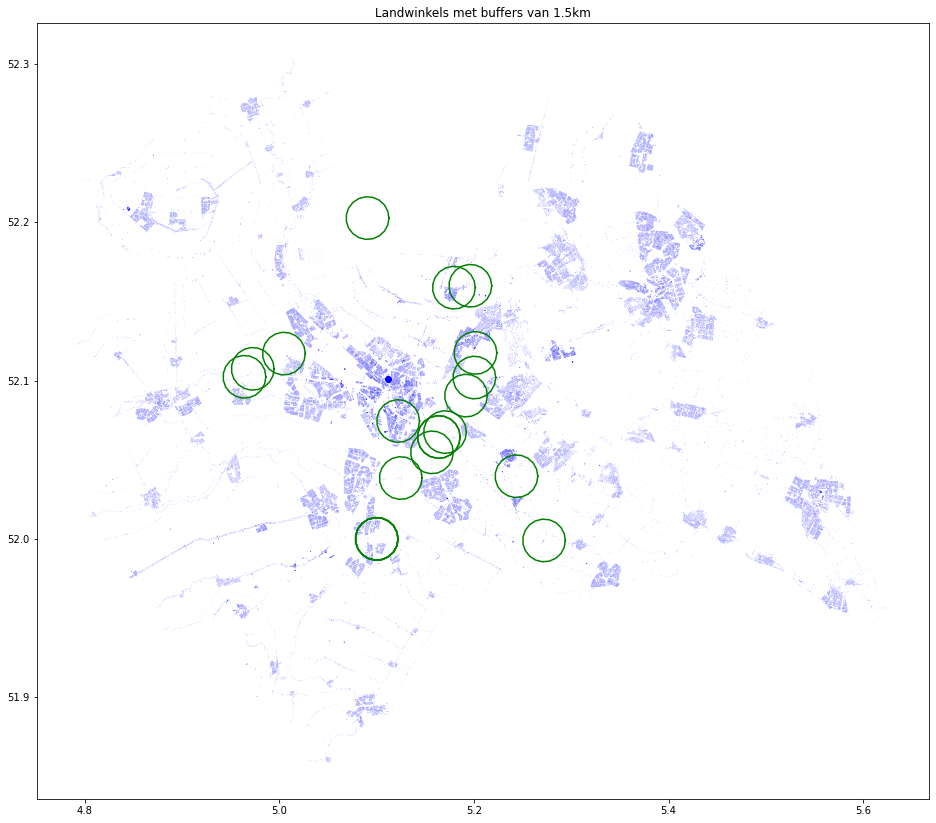

In [237]:
from shapely.geometry import Point, Polygon
import geog

fig,ax=plt.subplots(figsize=(16,16))
buildings.plot(ax=ax,color='b')
locatie_buffers_winkels2 = []

for i,row in winkels2.locatie.items():
    centre = row[::-1]
    
    n_points = 20
    d = 1.5*1000  # meters
    angles = np.linspace(0, 360, n_points)
    polygon = geog.propagate(centre, angles, d)
    buffer_poly = Polygon(polygon)
    ax.plot(buffer_poly.exterior.coords.xy[0], buffer_poly.exterior.coords.xy[1],color='g')
    locatie_buffers_winkels2.append(buffer_poly)
    
ax.set_title('Landwinkels met buffers van 1.5km')
    


In [238]:
intersected = pd.DataFrame(index=buildings.index)
for i,poly in enumerate(locatie_buffers_winkels2):
    intersected['{}'.format(i)]=buildings['geometry'].apply(lambda geom: poly.intersects(geom))

print('{:.5f}% huishoudens covered by landwinkels buffers'.format(intersected.any(axis='columns').sum()/len(buildings)*100))
   

/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


8.68023% huishoudens covered by landwinkels buffers


# Boederij- en Landwinkels (uit de aangeleverde .xlsx)

## Voornamelijk landelijk gebief, buffer van 3 km

In [239]:
winkels3 = pd.read_excel('data/Producenten_data/Boerderij- en landwinkels.xlsx').dropna(how='all').iloc[19:]

winkels3 = winkels3.dropna(axis=1,how='all')

       
    
    
winkels3['locatie'] = ''
for index, row in winkels3.iterrows():
    adres = row['Unnamed: 10']
    locatie = geocode_adres(adres)
    winkels3.loc[index]['locatie'] = locatie
    

/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [240]:
winkels3


/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,https://www.lekkerder.nl/?sort=in-de-buurt,Unnamed: 3,Unnamed: 10,Unnamed: 14,locatie
28,Veehouderij Hoogenraad,rundvleespakketten,"Werkhovenseweg 21, 3985 MG Werkhoven",tel:0343561557,"(52.0322325, 5.2402398)"
29,Kaasboerderij van Rossum,"kazen, fruitsappen, streekbier, jams, honing, ...","Helsdingse Achterweg 20, 4133 NC Vianen",tel:0347371580,"(51.9769551, 5.0708572)"
30,T Kaasmeisje,"kaas(planken), noten, tapas, wijn en kaasbegel...","3417 MR, Montfoort, Utrecht",tel:0680211208,"(52.0533738, 4.987134)"
31,Plattelandswinkel Vlooswijk,"zeer uitgebreid, AGF, streekproducten en (frui...","M a Reinaldaweg 66, 3461 AL Linschoten",tel:0348471600,"(52.0591983, 4.9189904)"
32,Kaasboerderij Sterreschans,"kaas, pakketten, honing, sappen","Oukoop 32, 3626 AX Nieuwer-Ter-Aa",tel:0294-231246,"(52.2032386, 4.9764111)"
33,De Beekhoeve,"vleeswaren, appelsap en allerlei boerenzuivelp...","Van Teylingenweg 172, 3471 GK Kamerik",tel:0348-401254,"(52.1488679, 4.8932339)"
34,Kaasboederij van der Arend,"kaas, zuivel en streekproducten","Demmeriksekade 17, 3645 AZ Vinkeveen",tel:0297-264982,"(52.2066658, 4.9632191)"
35,Hoeve Ravensteijn,"zeer uitgebreid, ook wel een bio supermarkt","Ravensteinselaan 3, 3744 ML Baarn",tel:0356668384,"(52.2173993, 5.262951)"
36,Van Vliet vlees,rundvleespakketten,"Damweg 25, 3421 GS Oudewater",tel:0348447585,"(52.0070643, 4.8900728)"
37,Ijsboederij Vernooij,schepijs,"Barwoutswaarder 67, 3449 HJ Woerden",tel:0348417618,"(52.0813625, 4.8435969)"


/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Landwinkels met buffers van 3km')

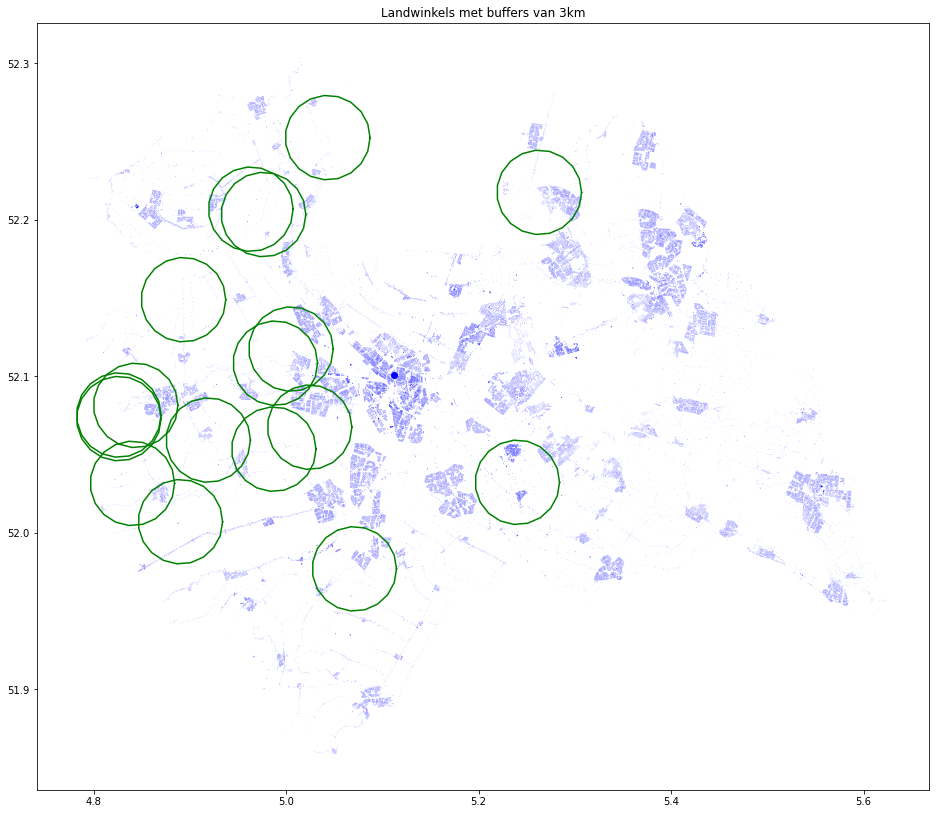

In [241]:
from shapely.geometry import Point, Polygon
import geog

fig,ax=plt.subplots(figsize=(16,16))
buildings.plot(ax=ax,color='b')
locatie_buffers_winkels3 = []

for i,row in winkels3.locatie.items():
    centre = row[::-1]
    
    n_points = 20
    d = 3*1000  # meters
    angles = np.linspace(0, 360, n_points)
    polygon = geog.propagate(centre, angles, d)
    buffer_poly = Polygon(polygon)
    ax.plot(buffer_poly.exterior.coords.xy[0], buffer_poly.exterior.coords.xy[1],color='g')
    locatie_buffers_winkels3.append(buffer_poly)
    
ax.set_title('Landwinkels met buffers van 3km')
    


In [242]:
intersected = pd.DataFrame(index=buildings.index)
for i,poly in enumerate(locatie_buffers_winkels3):
    intersected['{}'.format(i)]=buildings['geometry'].apply(lambda geom: poly.intersects(geom))

print('{:.5f}% huishoudens covered by landwinkels buffers'.format(intersected.any(axis='columns').sum()/len(buildings)*100))
   

/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16.89150% huishoudens covered by landwinkels buffers


# Gecombineerde data

/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


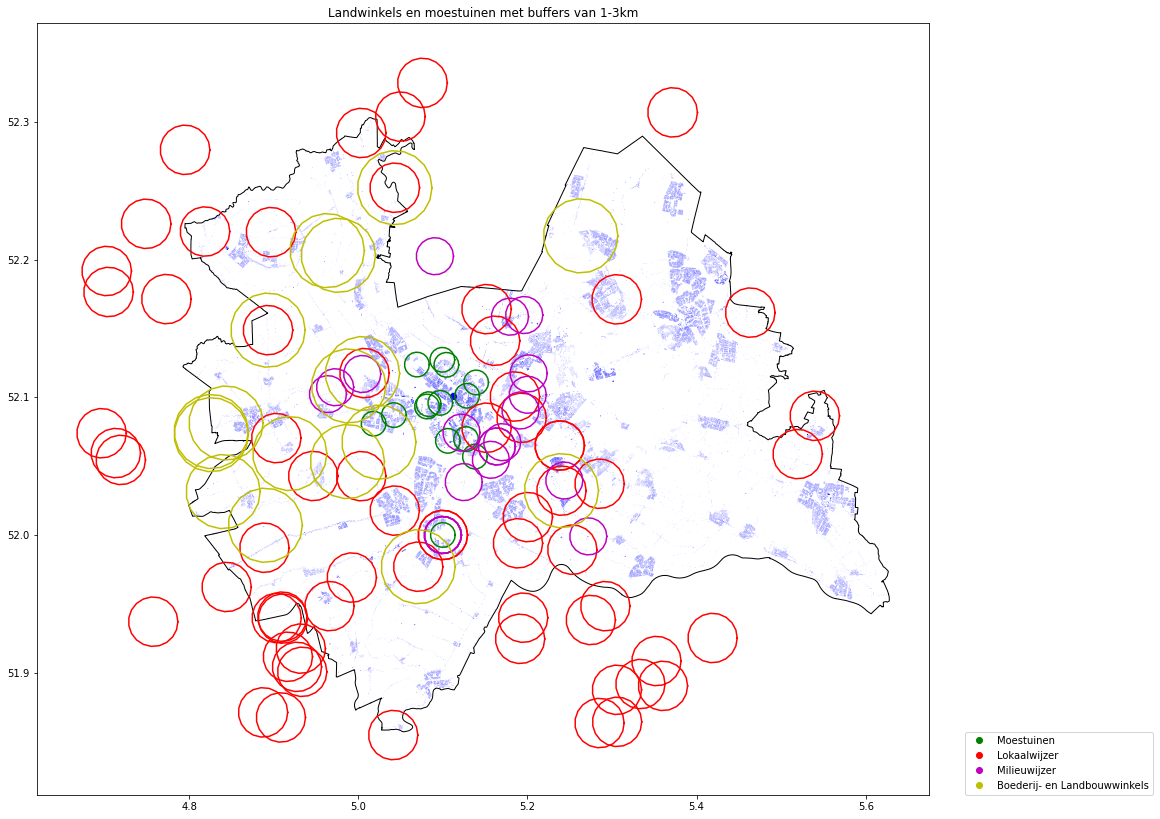

In [246]:

fig,ax=plt.subplots(figsize=(16,16))
utrecht_boundary.plot(ax=ax,edgecolor='k',facecolor='white')
buildings.plot(ax=ax,color='b')

locatie_buffers = [locatie_buffers_moestuinen,
                   locatie_buffers_winkels,
                   locatie_buffers_winkels2,
                   locatie_buffers_winkels3]

colors= ['g','r','m','y']
labels=['Moestuinen','Lokaalwijzer','Milieuwijzer','Boederij- en Landbouwwinkels']
cm = dict(zip(labels,colors))
for i,locatie_buffer in enumerate(locatie_buffers):
    for buffer_poly in locatie_buffer:

        ax.plot(buffer_poly.exterior.coords.xy[0], buffer_poly.exterior.coords.xy[1],color=colors[i])
        

ax.set_title('Landwinkels en moestuinen met buffers van 1-3km')
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in cm.values()]
plt.legend(markers, cm.keys(), loc=(1.04,0),numpoints=1)


In [247]:
locatie_buffers_all = []
for lb in locatie_buffers:
    locatie_buffers_all = locatie_buffers_all + lb

intersected = pd.DataFrame(index=buildings.index)
for i,poly in enumerate(locatie_buffers_all):
    intersected['{}'.format(i)]=buildings['geometry'].apply(lambda geom: poly.intersects(geom))

print('{:.5f}% huishoudens covered by landwinkels buffers'.format(intersected.any(axis='columns').sum()/len(buildings)*100))
  

/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


42.50636% huishoudens covered by landwinkels buffers
